In [5]:
#importing the necessary libraries.
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import DecisionTreeClassifier

ImportError: cannot import name 'DecisionTreeClassifier' from 'sklearn.model_selection' (c:\mushroom_classification1\myenv\Lib\site-packages\sklearn\model_selection\__init__.py)

In [ ]:
import os
print(os.getcwd())

c:\mushroom_classification1\notebooks


In [6]:
# Data-loading
df = pd.read_csv("data/mushrooms.csv")

In [ ]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
# There is no-null value present in the data

Text(0, 0.5, 'Count')

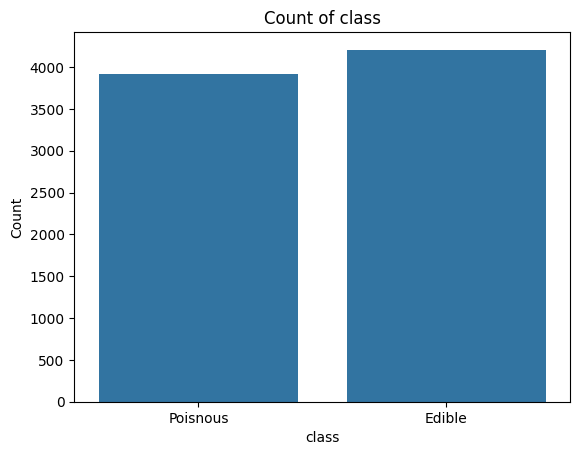

In [ ]:
# Create a visualization for our dataset with respect to our target variable : i.e. (Poisnous or Edible)
data = df.copy()
data['class']=data["class"].map({"e":"Edible","p":"Poisnous"})
ax = sns.countplot(data=data, x="class")
ax.set_title('Count of class')
ax.set_xlabel("class")
ax.set_ylabel('Count')

In [8]:
# Mapping the true values:
classes_mapping = {
    'e': 'edible', 'p': 'poisonous'
}
cap_shape_mapping = {
    'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'
}
cap_surface_mapping = {
    'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'
}
cap_color_mapping = {
    'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'
}
bruises_mapping = {
    't': 'bruises', 'f': 'no bruises'
}
odor_mapping = {
    'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'
}
gill_attachment_mapping = {
    'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'
}
gill_spacing_mapping = {
    'c': 'close', 'w': 'crowded', 'd': 'distant'
}
gill_size_mapping = {
    'b': 'broad', 'n': 'narrow'
}
gill_color_mapping = {
    'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'
}
stalk_shape_mapping = {
    'e': 'enlarging', 't': 'tapering'
}
stalk_root_mapping = {
    'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'
}
stalk_surface_above_ring_mapping = {
    'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'
}
stalk_surface_below_ring_mapping = {
    'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'
}
stalk_color_above_ring_mapping = {
    'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'
}
stalk_color_below_ring_mapping = {
    'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'
}
veil_type_mapping = {
    'p': 'partial', 'u': 'universal'
}
veil_color_mapping = {
    'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'
}
ring_number_mapping = {
    'n': 'none', 'o': 'one', 't': 'two'
}
ring_type_mapping = {
    'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'
}
spore_print_color_mapping = {
    'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'
}
population_mapping = {
    'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'
}
habitat_mapping = {
    'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'
}

In [9]:
# Apply the mappings to replace single-character codes with full words
df['class'] = df['class'].replace(classes_mapping)
df['cap-shape'] = df['cap-shape'].replace(cap_shape_mapping)
df['cap-surface'] = df['cap-surface'].replace(cap_surface_mapping)
df['cap-color'] = df['cap-color'].replace(cap_color_mapping)
df['bruises'] = df['bruises'].replace(bruises_mapping)
df['odor'] = df['odor'].replace(odor_mapping)
df['gill-attachment'] = df['gill-attachment'].replace(gill_attachment_mapping)
df['gill-spacing'] = df['gill-spacing'].replace(gill_spacing_mapping)
df['gill-size'] = df['gill-size'].replace(gill_size_mapping)
df['gill-color'] = df['gill-color'].replace(gill_color_mapping)
df['stalk-shape'] = df['stalk-shape'].replace(stalk_shape_mapping)
df['stalk-root'] = df['stalk-root'].replace(stalk_root_mapping)
df['stalk-surface-above-ring'] = df['stalk-surface-above-ring'].replace(stalk_surface_above_ring_mapping)
df['stalk-surface-below-ring'] = df['stalk-surface-below-ring'].replace(stalk_surface_below_ring_mapping)
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].replace(stalk_color_above_ring_mapping)
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].replace(stalk_color_below_ring_mapping)
df['veil-type'] = df['veil-type'].replace(veil_type_mapping)
df['veil-color'] = df['veil-color'].replace(veil_color_mapping)
df['ring-number'] = df['ring-number'].replace(ring_number_mapping)
df['ring-type'] = df['ring-type'].replace(ring_type_mapping)
df['spore-print-color'] = df['spore-print-color'].replace(spore_print_color_mapping)
df['population'] = df['population'].replace(population_mapping)
df['habitat'] = df['habitat'].replace(habitat_mapping)

In [10]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no bruises,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [12]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
# Define a function to create count plot and pie plot for a specific column
def plot_column_distribution(df, column_name):
    # Create subplots: 1 row, 2 columns (count plot and pie plot)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Create a count plot
    sns.countplot(data=df, x=column_name, ax=axes[0])
    axes[0].set_title(f'Count of {column_name}')
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Count')

    # Create a pie plot
    value_counts = df[column_name].value_counts()
    axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title(f'Distribution of {column_name}')
    
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Make a copy of your dataset in order to prevent your original dataset :
data = df.copy()

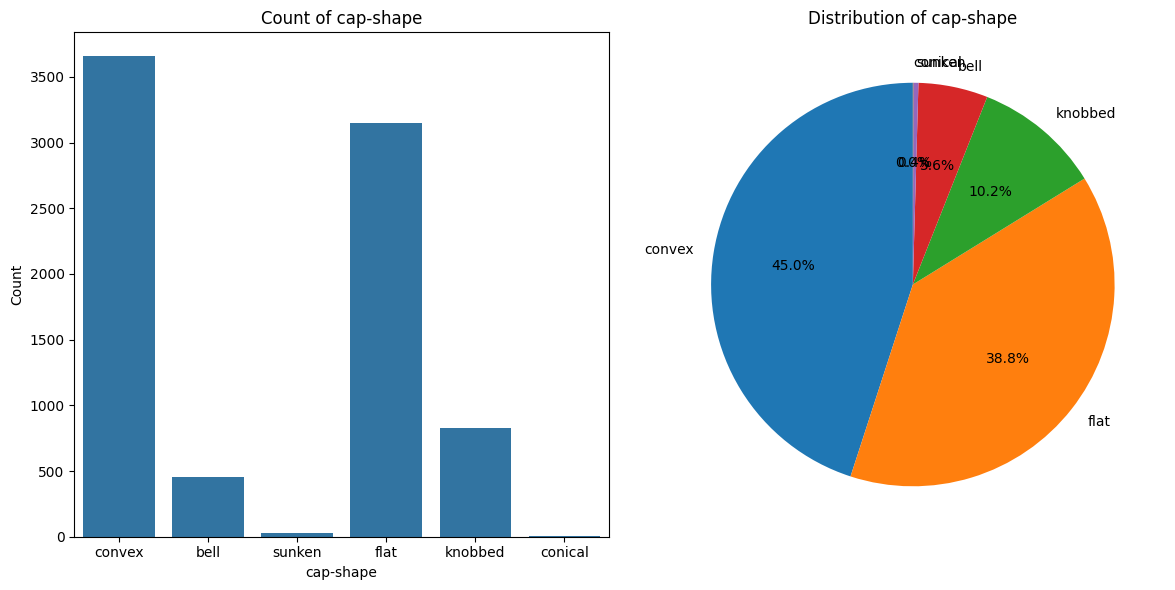

In [ ]:
# Getting insights for Cap-Shape
plot_column_distribution(data , "cap-shape")

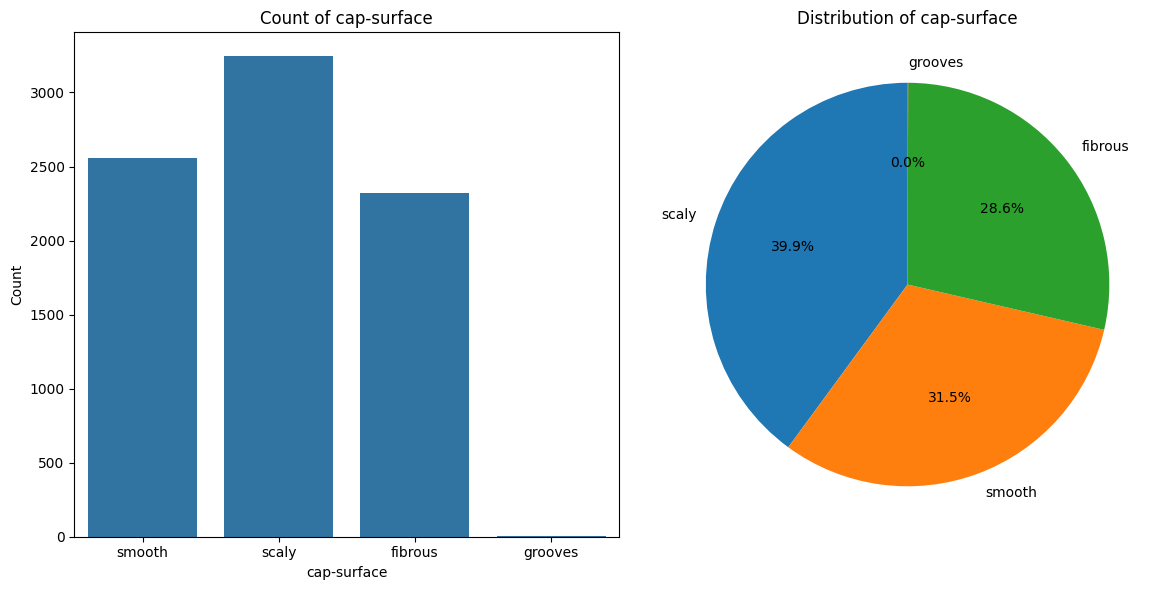

In [ ]:
plot_column_distribution(data, 'cap-surface')

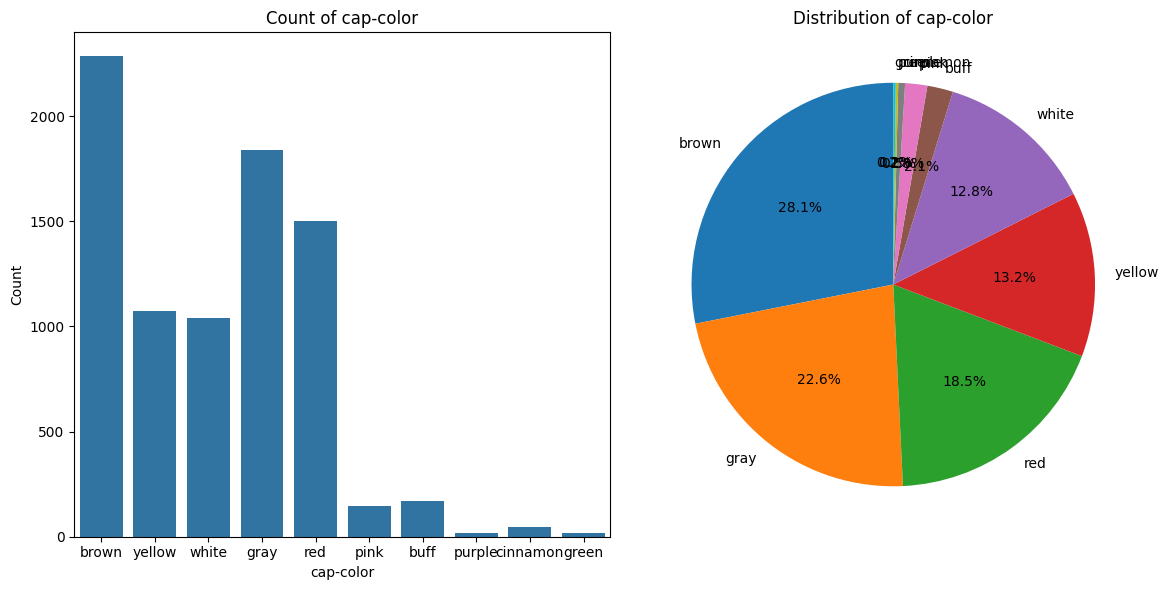

In [ ]:
plot_column_distribution(data, 'cap-color') 

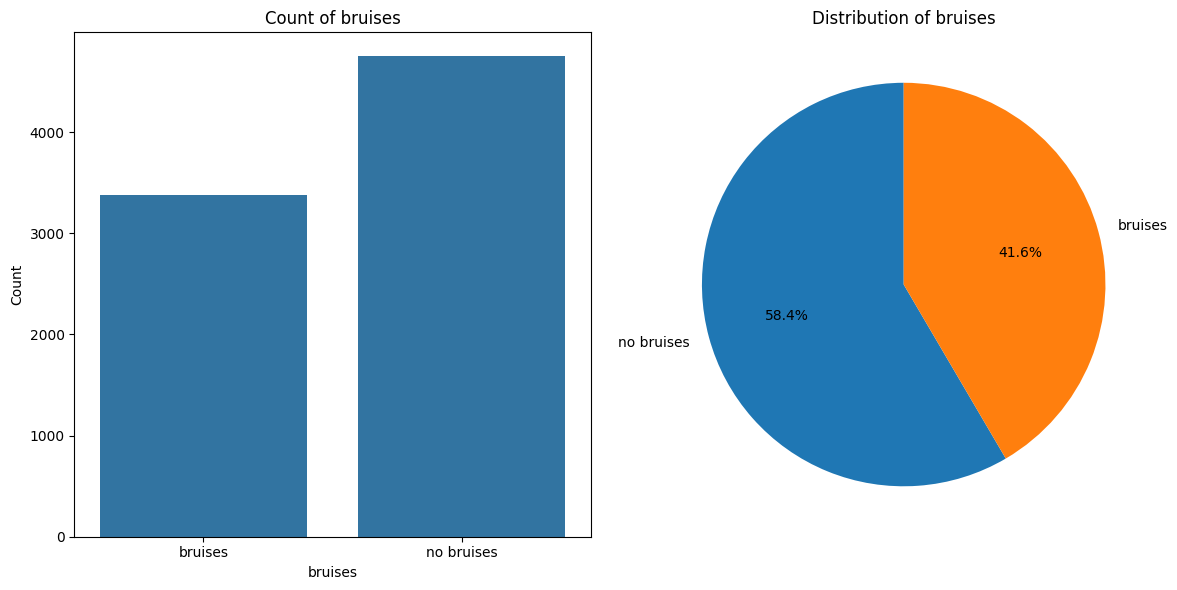

In [ ]:
plot_column_distribution(data , "bruises")

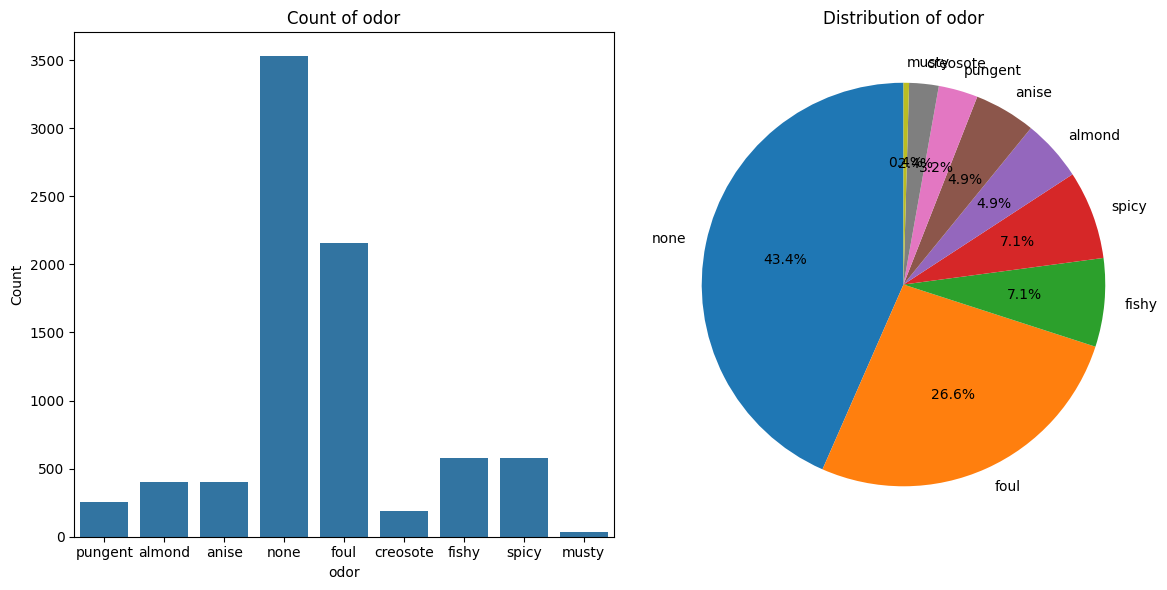

In [ ]:
plot_column_distribution(data, 'odor')

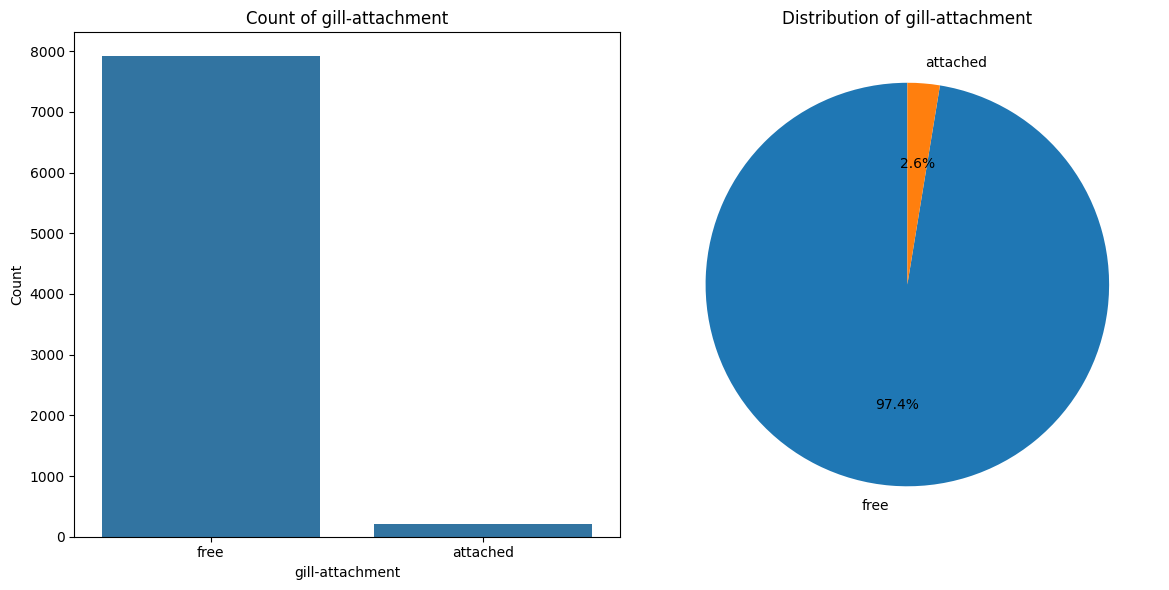

In [ ]:
plot_column_distribution(data, 'gill-attachment') 

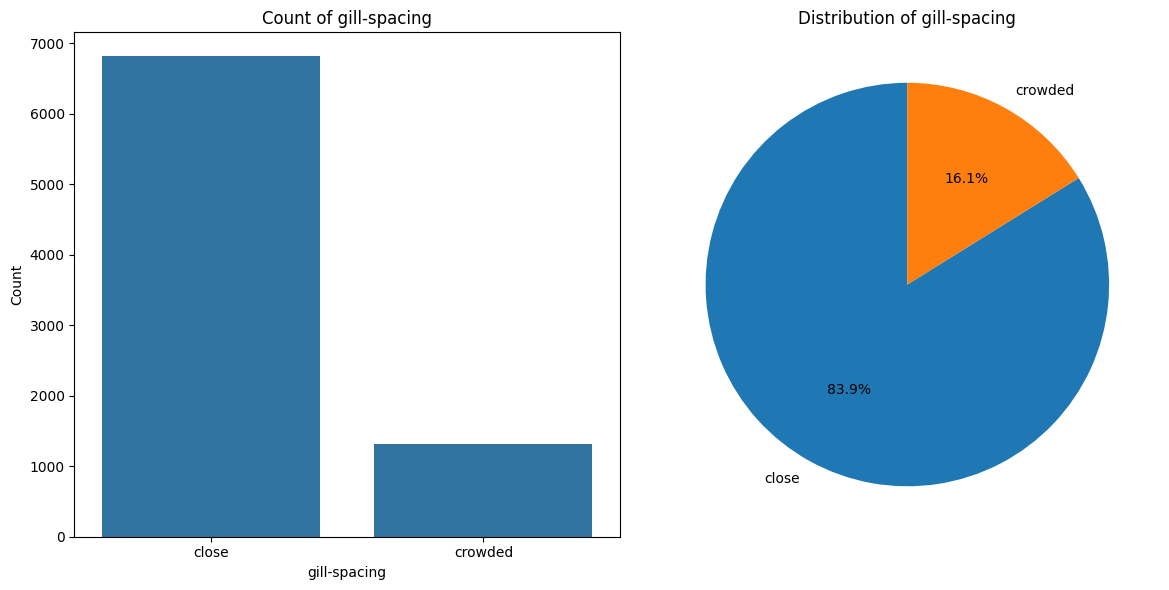

In [ ]:
plot_column_distribution(data, 'gill-spacing') 

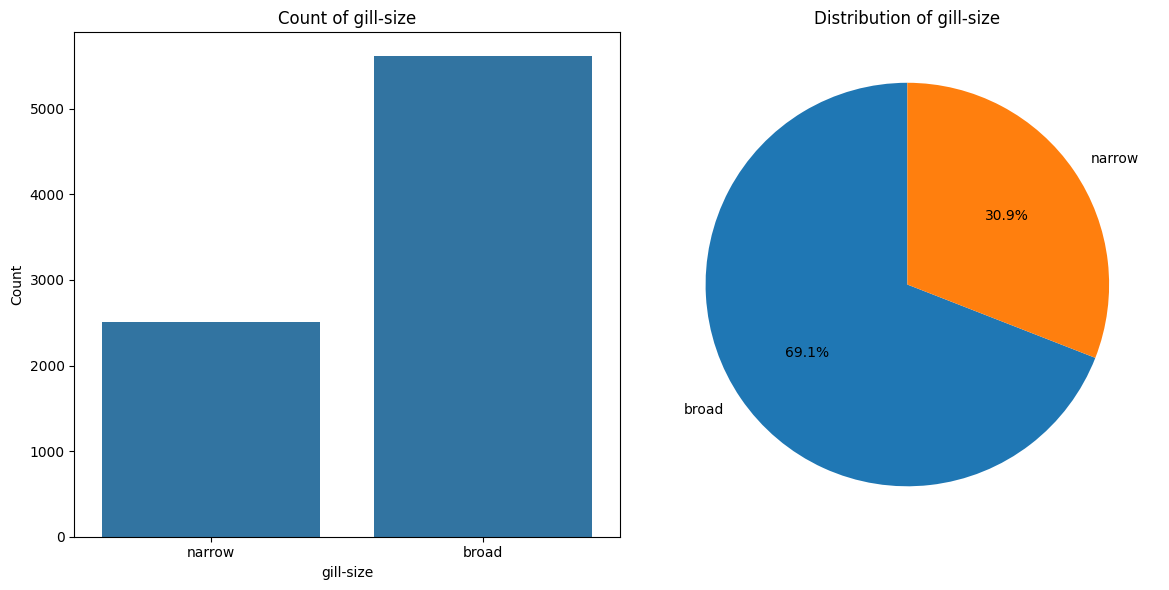

In [ ]:
plot_column_distribution(data, 'gill-size') 

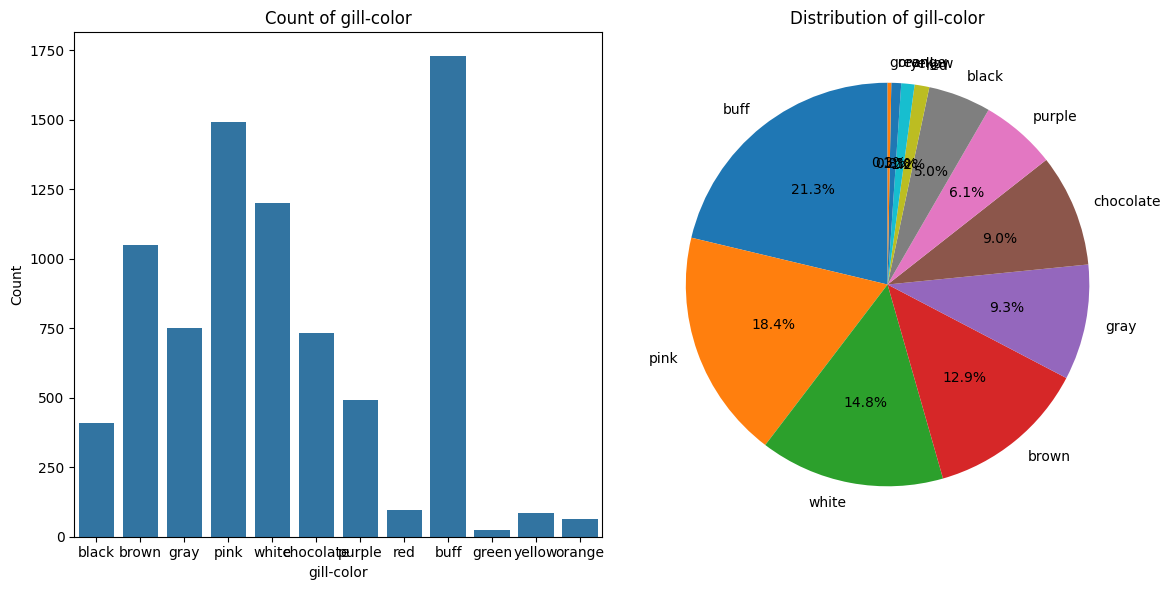

In [ ]:
plot_column_distribution(data, 'gill-color') 

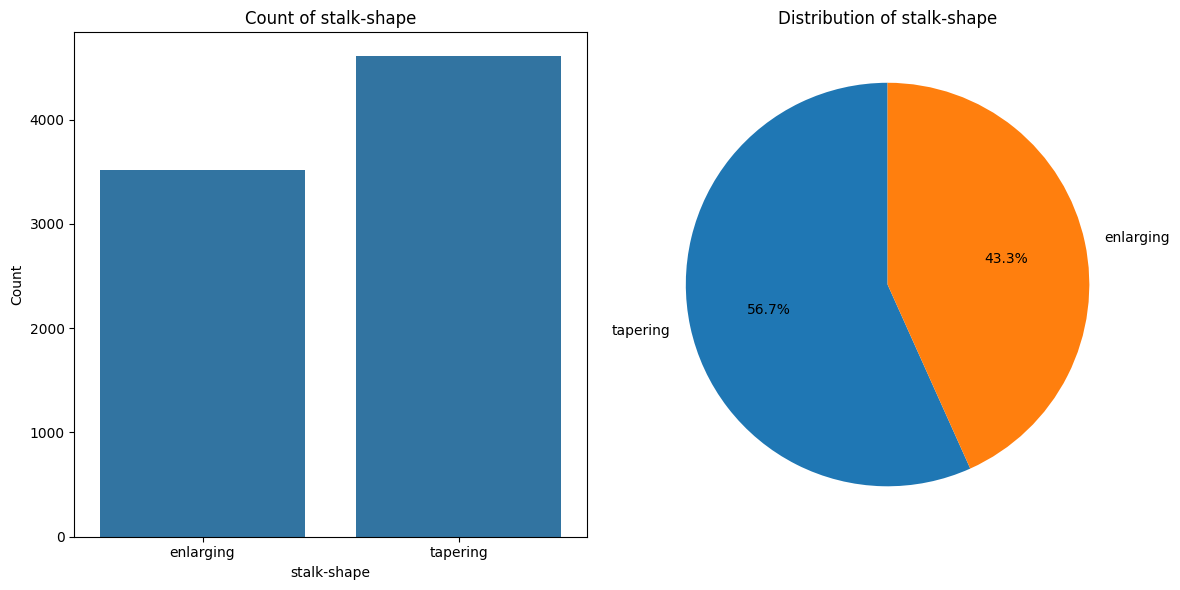

In [ ]:
plot_column_distribution(data, 'stalk-shape')

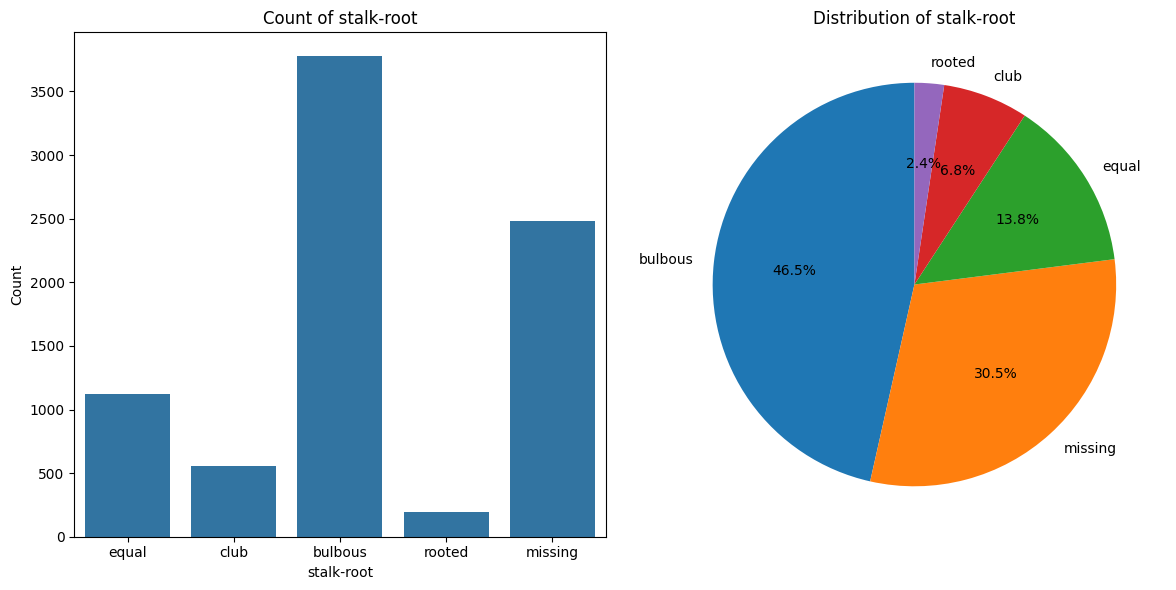

In [ ]:
plot_column_distribution(data, 'stalk-root')

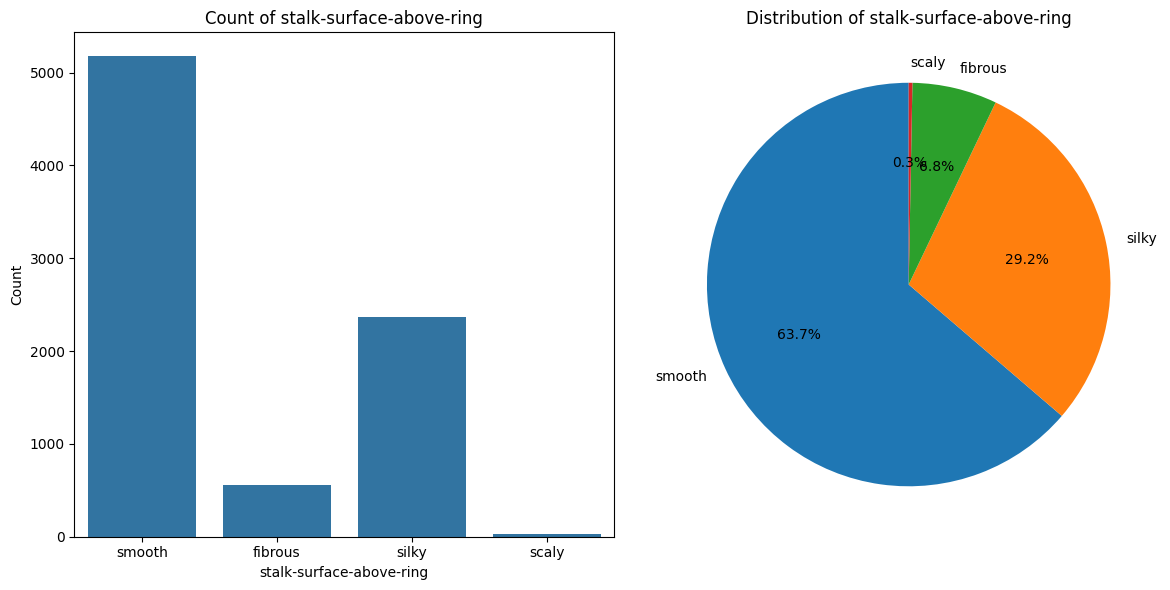

In [ ]:
plot_column_distribution(data, 'stalk-surface-above-ring')

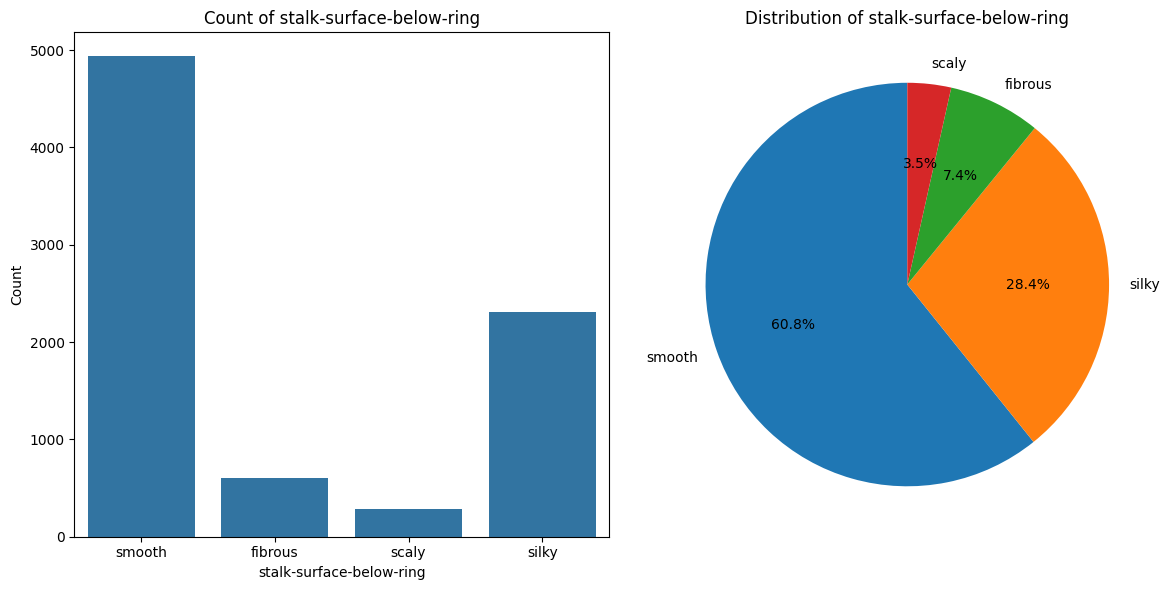

In [ ]:
plot_column_distribution(data, 'stalk-surface-below-ring') 

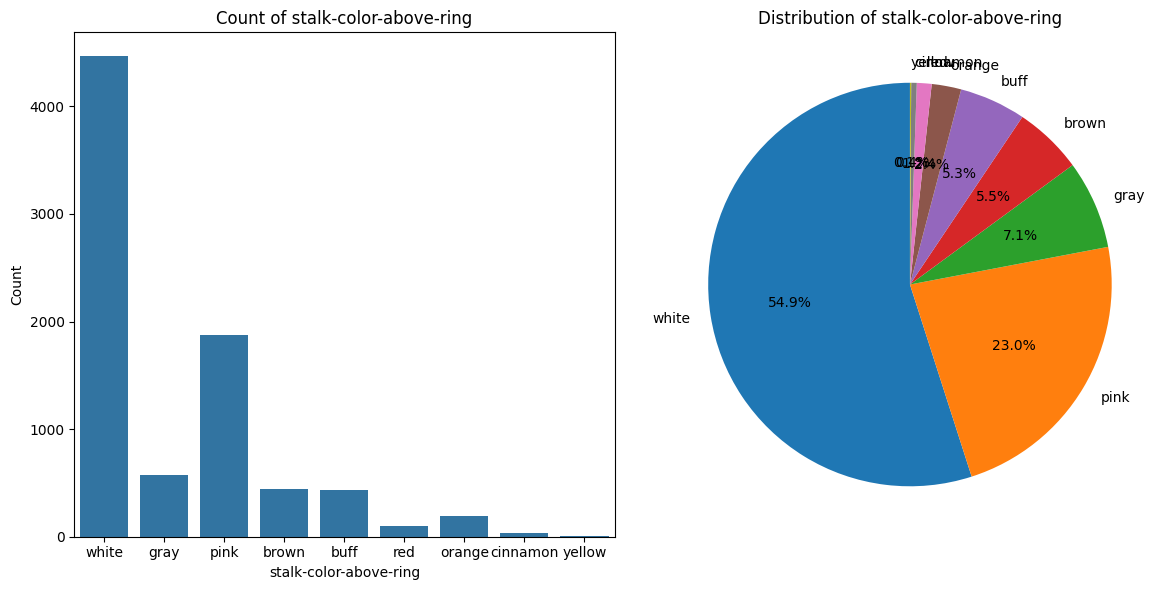

In [ ]:
plot_column_distribution(data, 'stalk-color-above-ring')

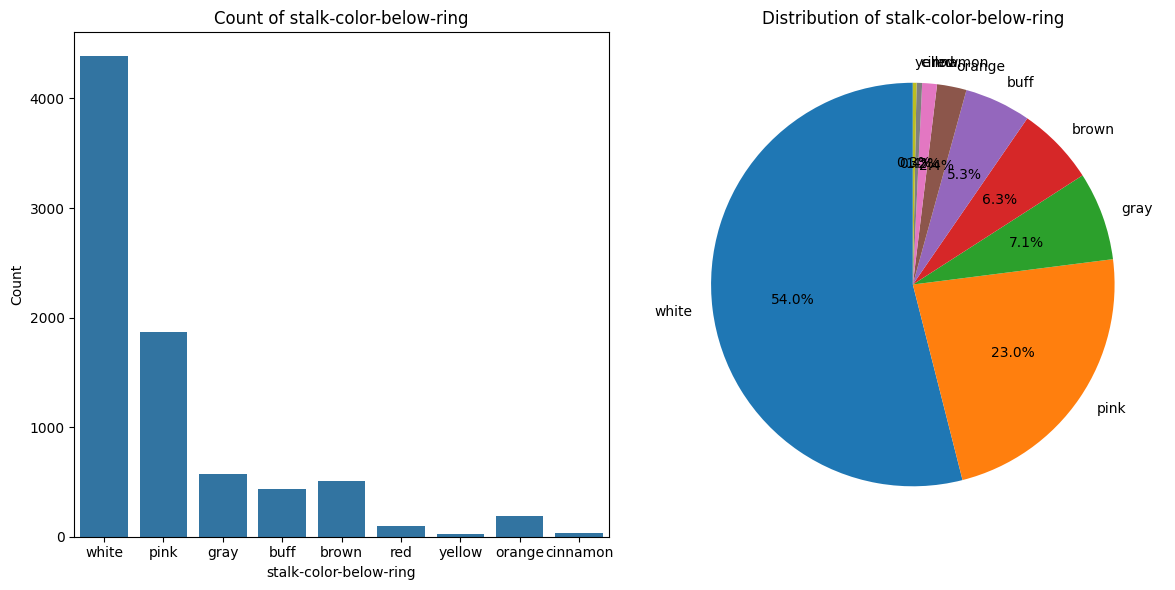

In [ ]:
plot_column_distribution(data, 'stalk-color-below-ring')

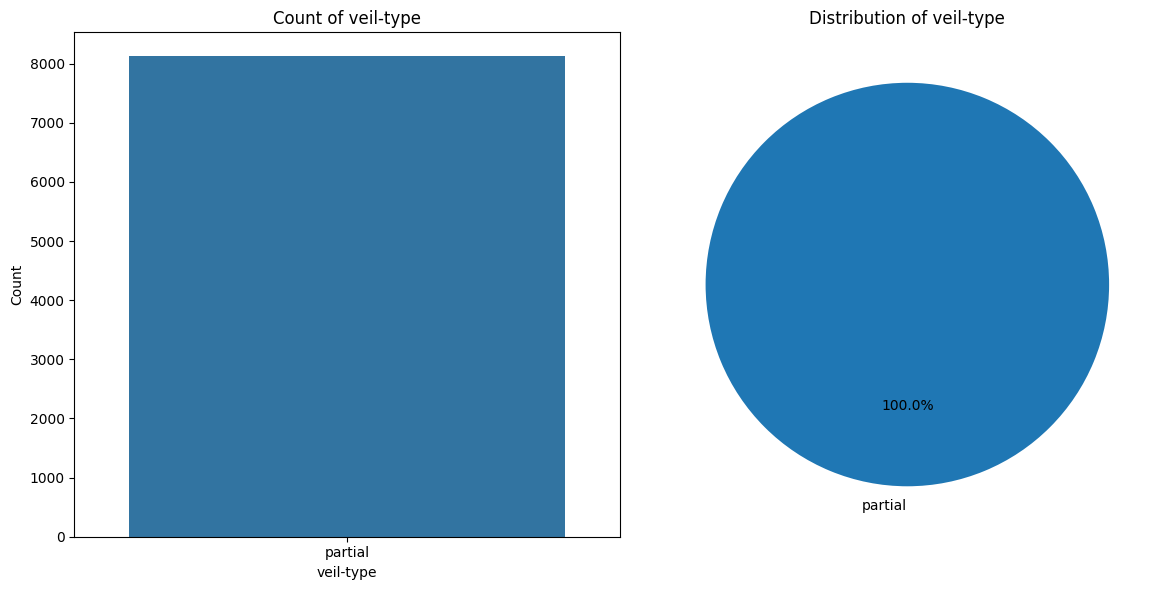

In [ ]:
plot_column_distribution(data, 'veil-type')

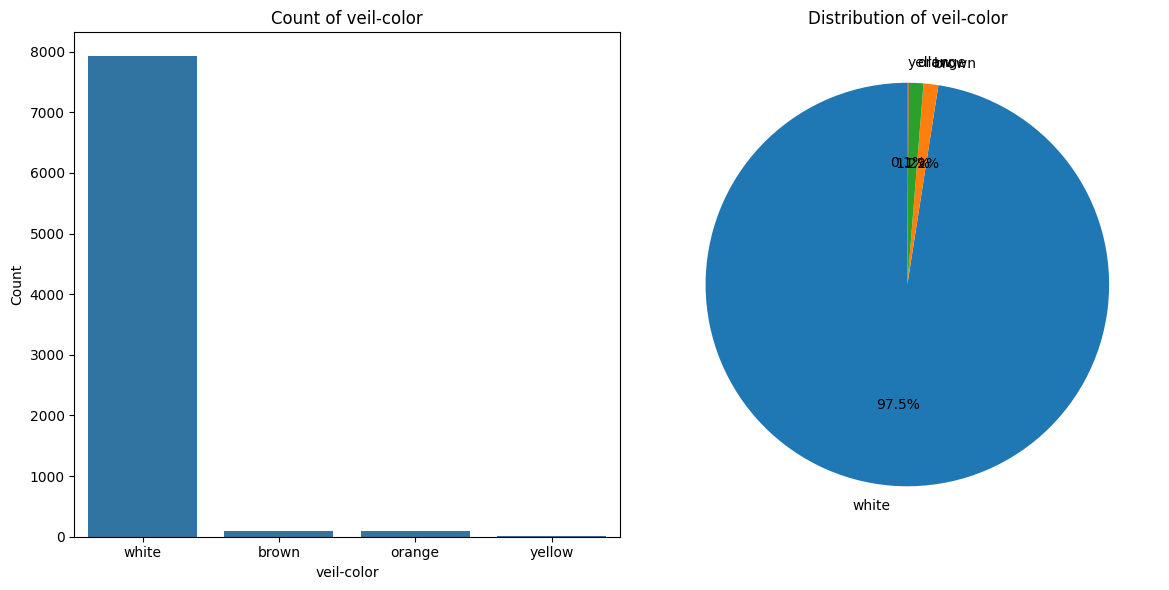

In [ ]:
plot_column_distribution(data, 'veil-color')

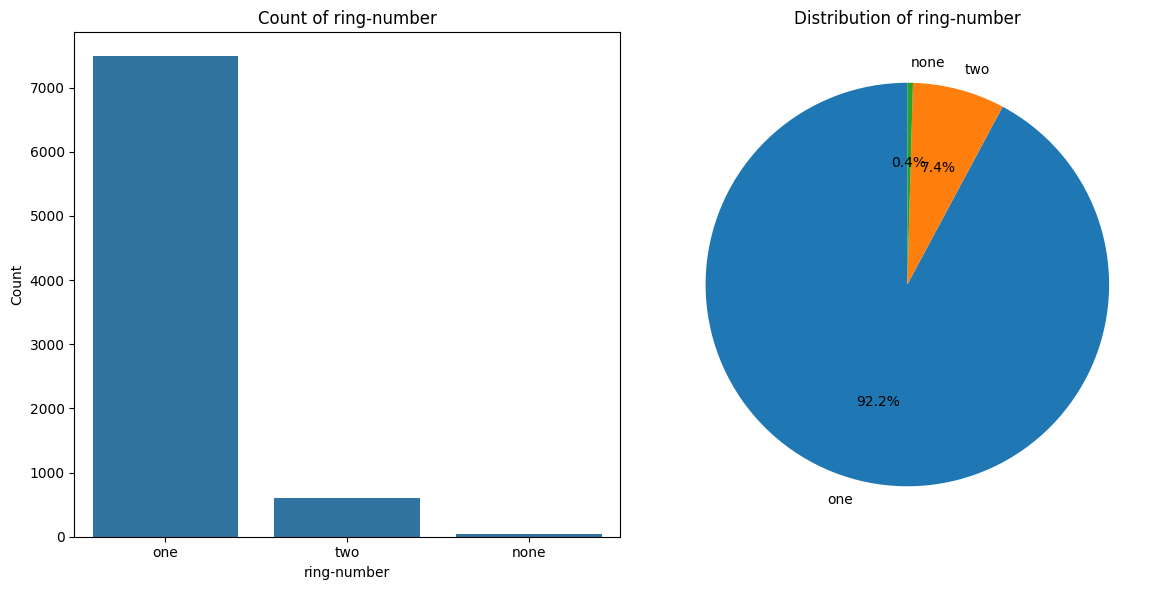

In [ ]:
plot_column_distribution(data, 'ring-number') 

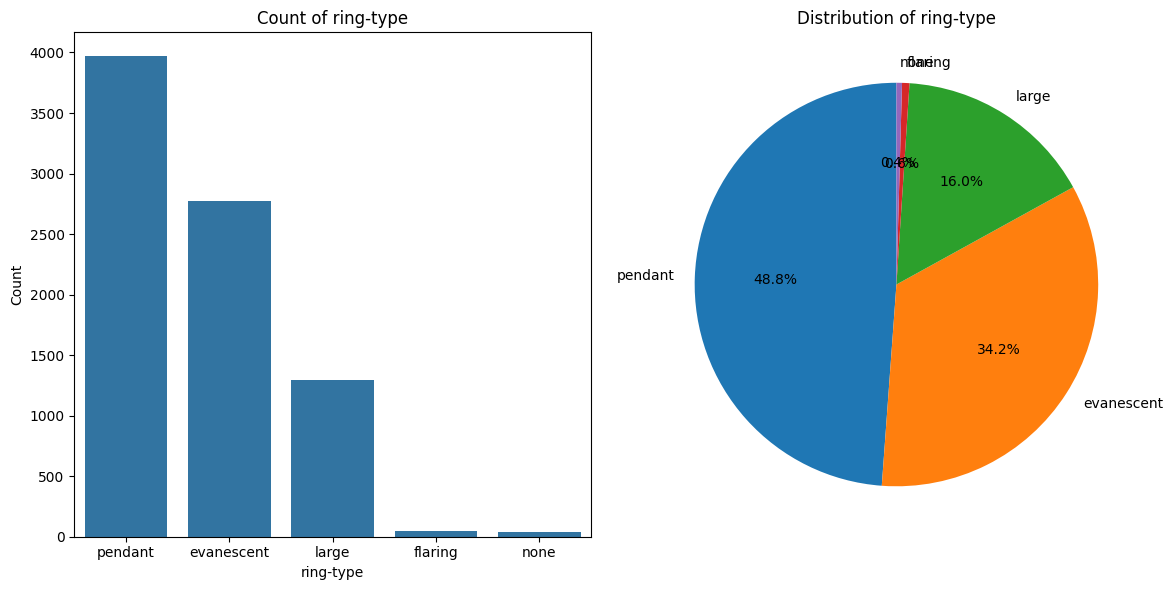

In [ ]:
plot_column_distribution(data, 'ring-type')

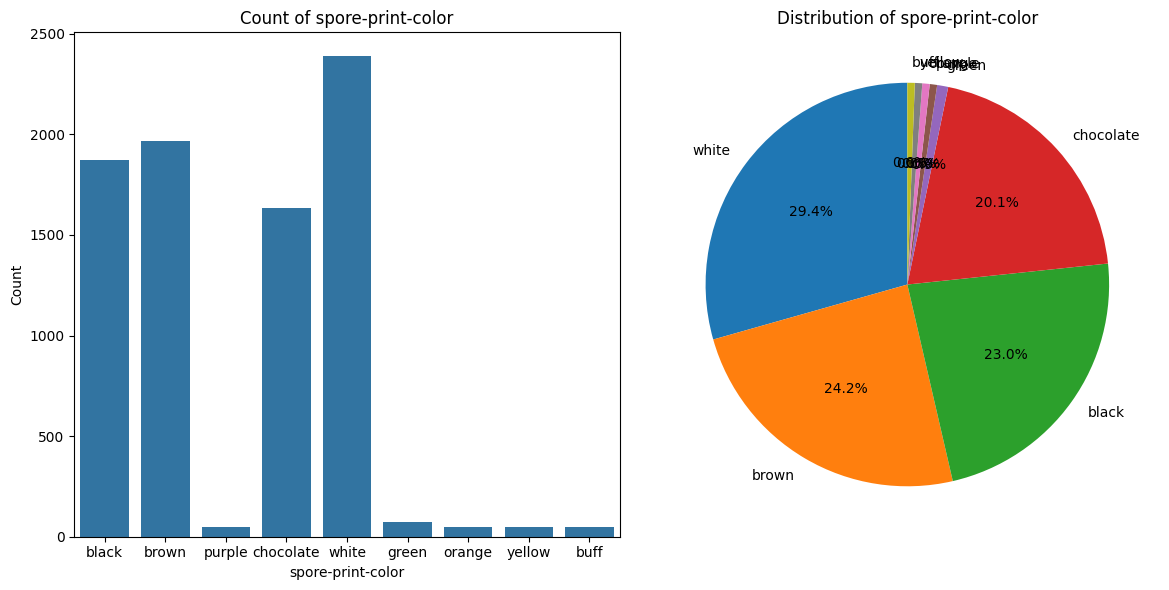

In [ ]:
plot_column_distribution(data, 'spore-print-color') 

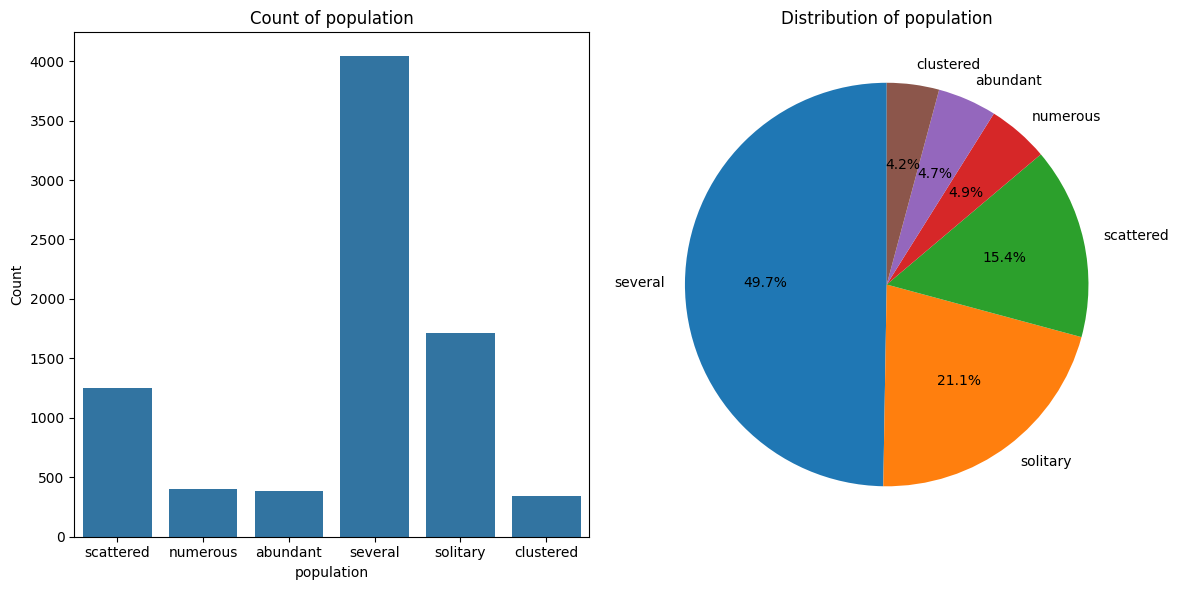

In [ ]:
plot_column_distribution(data, 'population') 

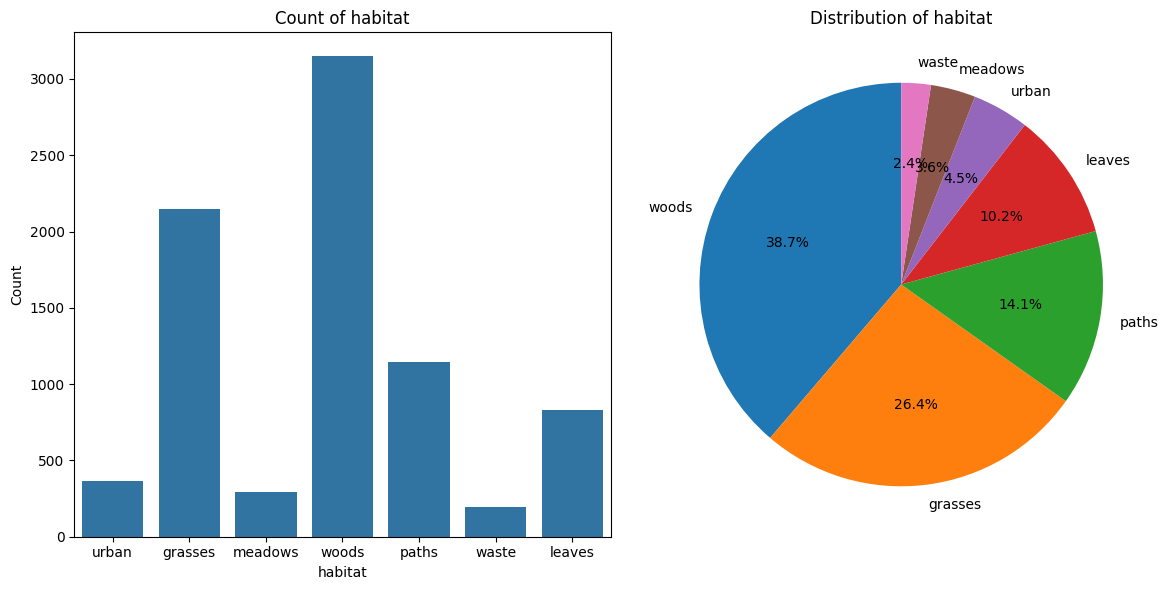

In [ ]:
plot_column_distribution(data, 'habitat') 

In [ ]:
# Label-Encoding
enc = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        df[col] = enc.fit_transform(df[col])

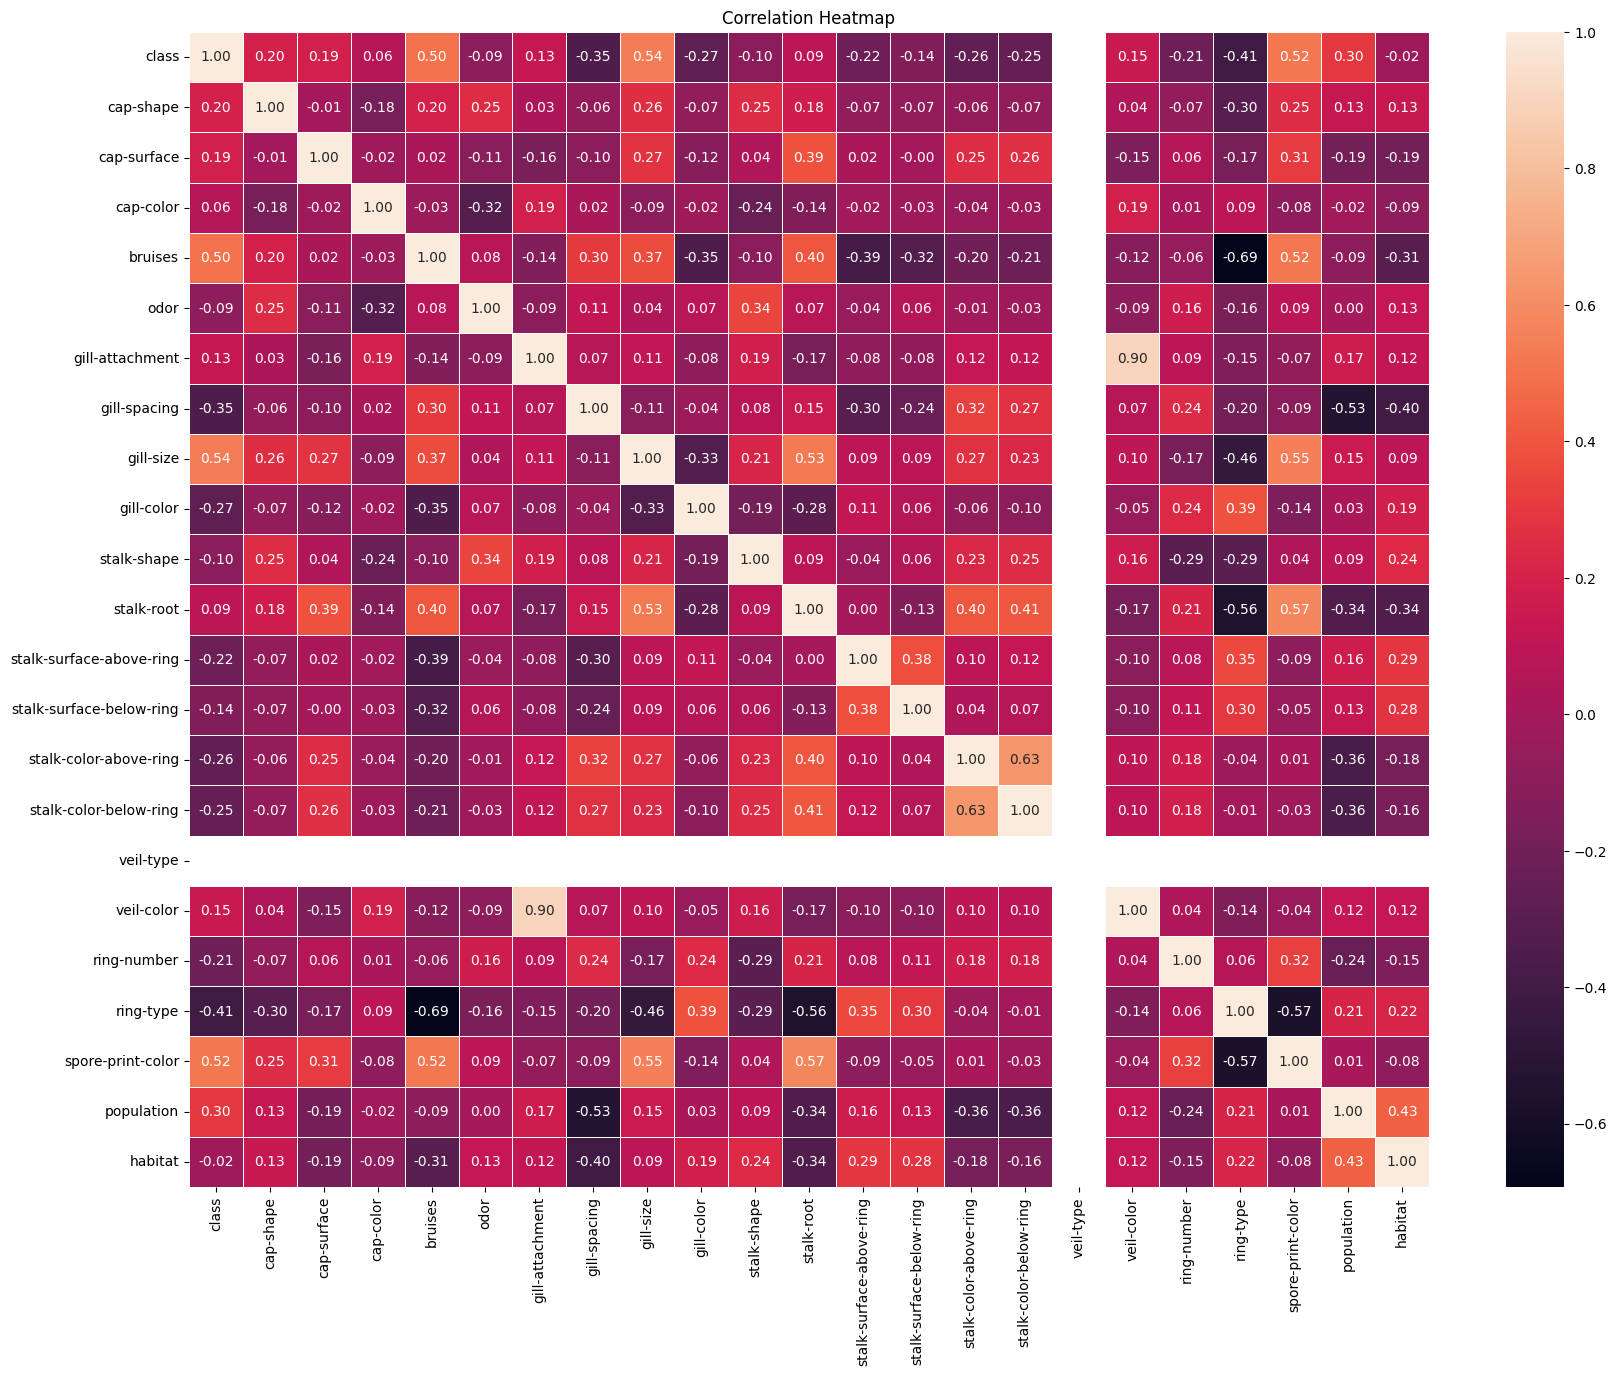

In [ ]:
# Draw the heatmap
plt.figure(figsize=(20, 15))  # Set the figure size
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Correlation Heatmap")
plt.show()